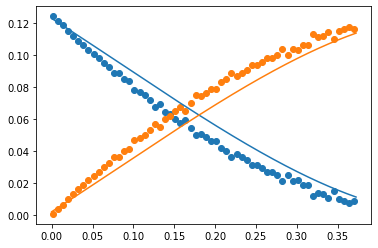

In [33]:
import numpy as np
from matplotlib import pyplot as plt

p1 = np.load('./Simulation_data/p1_0_inner_100.npy')
p2 = np.load('./Simulation_data/p2_0_inner_100.npy')
CB = np.load('./Simulation_data/CB_0_inner_100.npy')
CB = CB / 800.0
p1 = p1 / 2
p2 = p2 / 2
p1 = p1[np.argsort(CB)]
p2 = p2[np.argsort(CB)]
CB = CB[np.argsort(CB)]

inn = np.load('inn.npy')
out = np.load('out.npy')

xcb = np.arange(0,299,1)/800
plt.scatter(CB,p1)
plt.scatter(CB,p2)
plt.plot(xcb, inn/2)
plt.plot(xcb, out/2)


In [12]:
pt = 400/800
def fn(pcb, pt = pt, D = 1, omega = 0.0):

    
    


    a_lc = -1*(1-omega)*(-1) *pt**3
    b_lc = -1*(1-omega)*(2 + pt - 2*pcb) * pt**3
    c_lc = -1*(1-omega)*(-1-2*pt + 2*pcb - pcb**2 + 2*pcb*pt) *pt**1
    d_lc = -1*(1-omega)*(pt - 2*pt*pcb + pcb**2*pt)

    a_cb = 1*(1-omega)*pcb*D*(-1) *pt**3
    b_cb = 1.*(1-omega)*pcb*D*(2*pt) *pt**2
    c_cb = 1*(1-omega)*pcb*D*(1 - pt**2) *pt**1
    d_cb = +.0
    
    a_om = omega*(a_cb/((1-omega)*pcb*D) + a_lc/(1-omega)) * pt**3
    b_om = omega*(b_cb/((1-omega)*pcb*D) + b_lc/(1-omega)) * pt**2
    c_om = omega*(c_cb/((1-omega)*pcb*D) + c_lc/(1-omega)) * pt**1
    d_om = omega*(d_cb/((1-omega)*pcb*D) + d_lc/(1-omega))

    #print(a_lc, b_lc, c_lc, d_lc)
    #print(a_cb, b_cb, c_cb, d_cb)
    #print('================================')
    
    
    
    coef = [a_lc+a_cb + a_om, b_lc+b_cb + b_om, c_lc+c_cb + c_om, d_lc+d_cb + d_om]
    
    solutions = np.roots(coef)
    return np.real(solutions[np.isreal(solutions)][-1])

def fn2(p1, pcb, pt = pt, D = 1, omega = 0.0):

    
    


    a_lc = -1*(1-omega)*(-1)
    b_lc = -1*(1-omega)*(2 + pt - 2*pcb)
    c_lc = -1*(1-omega)*(-1-2*pt + 2*pcb - pcb**2 + 2*pcb*pt)
    d_lc = -1*(1-omega)*(pt - 2*pt*pcb + pcb**2*pt)

    a_cb = 1*(1-omega)*pcb*D*(-1)
    b_cb = 1*(1-omega)*pcb*D*(2*pt)
    c_cb = 1*(1-omega)*pcb*D*(1 - pt**2)
    d_cb = +.0
    
    a_om = omega*(a_cb/((1-omega)*pcb*D) + a_lc/(1-omega))
    b_om = omega*(b_cb/((1-omega)*pcb*D) + b_lc/(1-omega))
    c_om = omega*(c_cb/((1-omega)*pcb*D) + c_lc/(1-omega))
    d_om = omega*(d_cb/((1-omega)*pcb*D) + d_lc/(1-omega))

    
    
    
    coef = [a_lc+a_cb + a_om, b_lc+b_cb + b_om, c_lc+c_cb + c_om, d_lc+d_cb + d_om]
    
    LC = a_lc *  p1**3 + b_lc*   p1**2 + c_lc*   p1 + d_lc
    CB = a_cb *  p1**3 + b_cb*   p1**2 + c_cb*   p1 + d_cb
    OM = a_om *  p1**3 + b_om*   p1**2 + c_om*   p1 + d_om
    CO = coef[0]*p1**3 + coef[1]*p1**2 + coef[2]*p1 + coef[3]
    
    return LC, CB, CO, OM

    
    





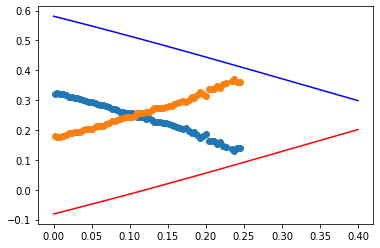

In [10]:
Pcb = np.linspace(1e-5,0.4, 100)
D_try = np.linspace(.2, .2, 1)
for d in D_try:
    Pcb_bin = []
    for i in range(len(Pcb)):
        Pcb_bin.append(fn(Pcb[i], omega = .0))
    
    plt.plot(Pcb, Pcb_bin, color = 'blue')
    plt.plot(Pcb, pt - np.array(Pcb_bin), color = 'red')

plt.scatter(CB, p1)
plt.scatter(CB, p2)

#plt.ylim(0,1)

In [15]:
def v(p1,p2, omega):
    return p1*(1-omega)*(1-p1) + p2*(1-omega)*(1 - p2)

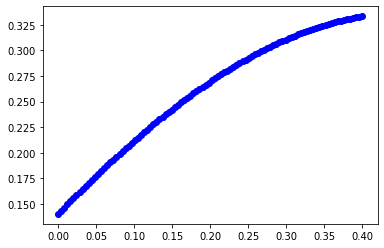

In [16]:
for i in range(len(Pcb)):
    plt.scatter(Pcb[i], v(Pcb_bin[i], (pt - Pcb_bin[i]), 0.1), color = 'blue')


PT 0.125
0.12483663581817656
0.11740776095328885
0.10966476507374949
0.10168727122935083
0.0935589485827972
0.08536494430902408
0.07718977330481445
0.0691157005643371
0.06122156867001434
0.053581972732886854


Text(0, 0.5, 'fn(P1)')

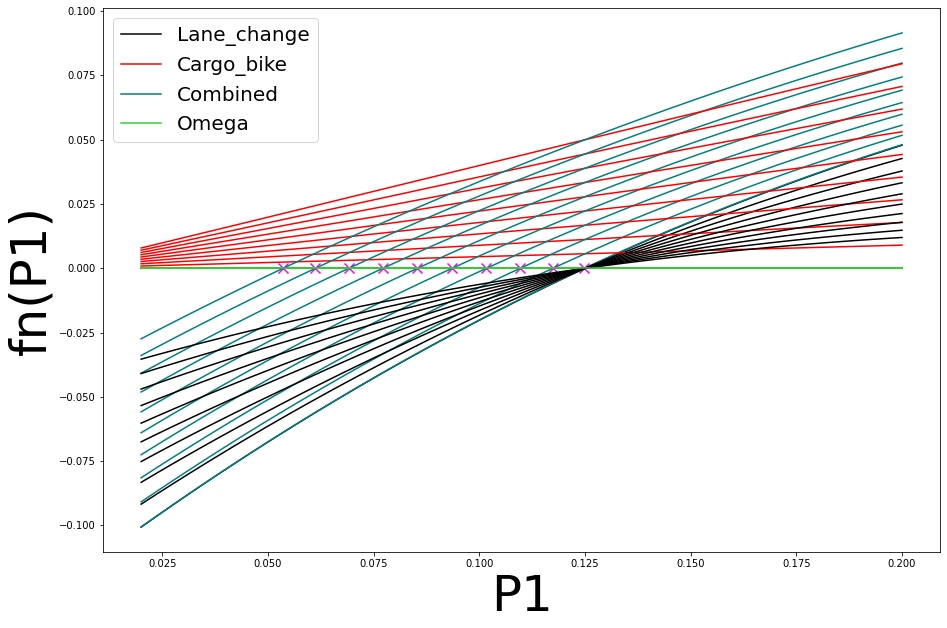

In [10]:
Pcb = np.linspace(0.001,.4,10)
P1 = np.linspace(0.02,.2)
print('PT', pt)
bin_lc = []
bin_cb = []
bin_co = []
fig, ax = plt.subplots(1,1 , figsize = (15,10))
for i in range(len(Pcb)):
    lc, cb, co, om = fn2(P1,Pcb[i])
    ax.plot(P1, lc, color = 'black')
    ax.plot(P1, cb, color = 'red')
    ax.plot(P1, co, color = 'teal')
    ax.plot(P1, om, color = 'limegreen')
    ax.scatter(fn(Pcb[i]), 0, marker = 'x', color = 'magenta', s = 100)
    print(fn(Pcb[i]))
    #f i > 0:
     #  print('diff', fn(Pcb[i]) - fn(Pcb[i-1]))
    #bin_lc.append(lc)
    #bin_cb.append(cb)
    #io.append(co)
    ax.legend(['Lane_change', 'Cargo_bike', 'Combined', 'Omega'], fontsize = 20)
ax.set_xlabel('P1', fontsize = 50)
ax.set_ylabel('fn(P1)', fontsize = 50)